In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [87]:
data = pd.read_csv('/content/Live.csv')


In [88]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [90]:
data.drop(['status_id','status_published','Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [91]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le = LabelEncoder()

In [94]:
data['status_type']=le.fit_transform(data['status_type'])

In [122]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [96]:
data['status_type'].unique()

array([3, 1, 0, 2])

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scalar = MinMaxScaler()

In [125]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X=data.drop('status_type',axis=1)
y=data['status_type']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [130]:
y_test.shape

(2115,)

In [134]:
from sklearn.cluster import KMeans

In [135]:
kmeans = KMeans(n_clusters=2)

In [136]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2)

In [137]:
y_pred = kmeans.predict(X_test_scaled)

In [139]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_train == labels)
correct_labels

193

In [140]:
from sklearn.metrics import silhouette_score,accuracy_score

In [142]:
print(accuracy_score(y_test,y_pred))

0.03877068557919622


In [143]:
wcss =[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)

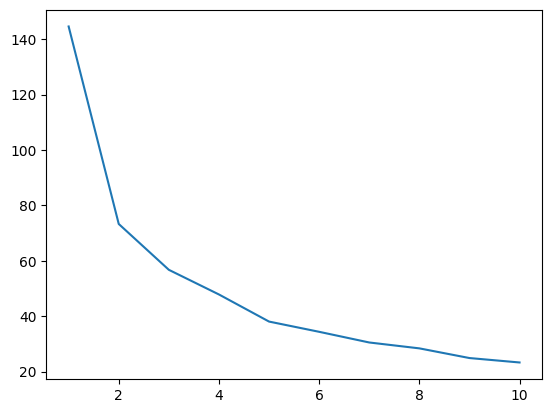

In [144]:
plt.plot(range(1,11),wcss)

In [145]:
!pip install kneed
from kneed import KneeLocator

In [161]:
kl = KneeLocator(range(1,11),wcss,curve='concave',direction='decreasing')

In [162]:
kl.elbow

np.int64(10)

In [148]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [149]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [150]:
kmeans.inertia_

56.754607771615085

In [151]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [152]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_train == labels)

In [153]:
correct_labels

185

In [157]:
silhouette_coffecients=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coffecients.append(score)

In [158]:
silhouette_coffecients

[np.float64(0.8114141553092202),
 np.float64(0.8058384464967538),
 np.float64(0.7298896464394993),
 np.float64(0.7049722600808942),
 np.float64(0.7054599184074655),
 np.float64(0.6746202045130847),
 np.float64(0.6294225741343864),
 np.float64(0.6291256490746117),
 np.float64(0.6330748323081175)]

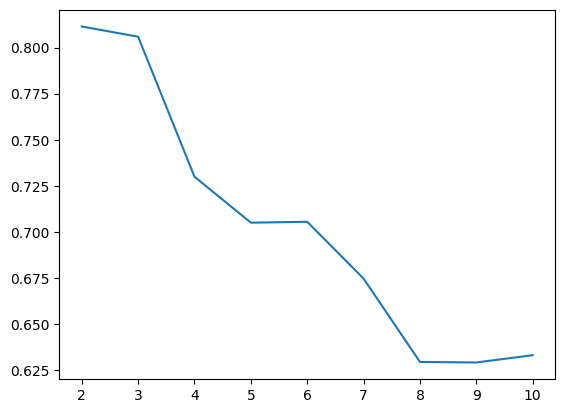

In [159]:
plt.plot(range(2,11),silhouette_coffecients)